In [1]:
import os
import numpy as np
from matplotlib import pyplot

In [2]:
# Leer datos
data = np.loadtxt("soybean_JUL14_Clean_File.txt", delimiter=',')
X, y = data[:, :7], data[:, 7]
m = y.size

In [3]:
X.shape

(942, 7)

In [4]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [5]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.00000e+00 0.00000e+00 1.09350e+03 ... 1.09350e+03 0.00000e+00
  0.00000e+00]
 [2.00000e+00 0.00000e+00 1.10700e+03 ... 1.10700e+03 0.00000e+00
  0.00000e+00]
 [3.00000e+00 0.00000e+00 1.06700e+03 ... 1.06700e+03 0.00000e+00
  0.00000e+00]
 ...
 [9.40000e+02 1.33000e+03 1.34775e+03 ... 1.32975e+03 1.04400e+03
  1.42200e+03]
 [9.41000e+02 1.32975e+03 1.34025e+03 ... 1.29575e+03 9.58000e+02
  7.49000e+02]
 [9.42000e+02 1.30250e+03 1.30850e+03 ... 1.29500e+03 9.92000e+02
  2.99000e+02]]
Media calculada: [  471.5          578.87791932  1280.10536093  1272.76698514
  1276.55254777  8628.99681529 26586.68895966]
Desviación estandar calculada: [  271.93182356   654.43003989    80.49505204    75.2145576
    77.76962566 22155.26646432 62091.68272131]
[[-1.73021309 -0.88455279 -2.31822151 ... -2.35377946 -0.38947836
  -0.42818438]
 [-1.7265357  -0.88455279 -2.15050934 ... -2.18018984 -0.38947836
  -0.42818438]
 [-1.7228583  -0.88455279 -2.64743429 ... -2.69452946 -0.38947836
  -0.42818438]
 .

In [6]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [7]:
def calcularCosto(X, y, theta):
  m = y.shape[0]
  J = 0
  h = np.dot(X, theta)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [8]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

theta calculado por el descenso por el gradiente: [591807.90894206   6756.64372189 -24028.69609896    891.13130626
   5193.79630843   4454.07590931   5108.99517164   8228.45253316]
El valor predecido es (usando el descenso por el gradiente): 4692957.9920


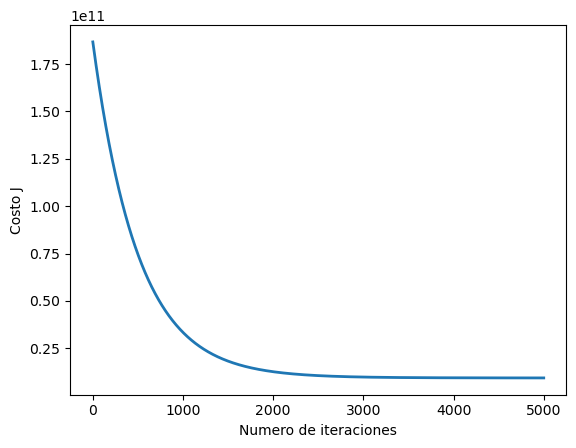

In [9]:
theta = np.zeros(8)

alpha = 0.001
num_ite = 5000

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [8, 0, 1088, 1088, 1088, 0, 0, 621891]
X_array[1:8] = (X_array[1:8] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [13]:
#Utilizando la ecuacion de la norma

In [14]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [15]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [16]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")


los valores de theta calculados son: [ 4.67466090e+05  8.50687462e+01 -4.63086429e+01 -1.67413352e+03
  6.95044740e+02  1.07029959e+03  1.23982108e-01  2.30087211e-01]


In [18]:
X_array = [8, 0, 1088, 1088, 1088, 0, 0, 621891]
price = np.dot(X_array, theta) 

print('Precio predecido para un volumen de soya de 1088 (usando la ecuación de la normal): ${:.0f}'.format(price))

Precio predecido para un volumen de soya de 1088 (usando la ecuación de la normal): $2767185
